In [12]:
import pandas as pd
import yfinance as yf
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
import warnings

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [11]:
tesla=yf.Ticker("TSLA")
tesla_data=tesla.history(period='max')
tesla_data=tesla_data.reset_index()
tesla_data.head(5)                                          #first Question#



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find_all('table')
tesla_revenue = pd.read_html(str(tables[1]), flavor='bs4')[0]
# Check the original column names
print("Original Column Names:")
print(tesla_revenue.columns)
# Remove leading/trailing whitespaces and rename columns
tesla_revenue.columns = [col.strip() for col in tesla_revenue.columns]
tesla_revenue.columns = ['Date', 'Revenue']

# Print new column names
print("\nRenamed Column Names:")
print(tesla_revenue.columns)

# Clean the "Revenue" column by removing '$' and commas
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True)

# Drop NaN values and rows with empty "Revenue" column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
warnings.filterwarnings("ignore", category=FutureWarning)
# Display the last few rows
print("\nLast Few Rows:")
print(tesla_revenue.tail())


Original Column Names:
Index(['Tesla Quarterly Revenue (Millions of US $)', 'Tesla Quarterly Revenue (Millions of US $).1'], dtype='object')

Renamed Column Names:
Index(['Date', 'Revenue'], dtype='object')

Last Few Rows:
          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [23]:
#3rd question Gme data through yfinance#
gme=yf.Ticker("GME")
gme_data=gme.history(period='max')
gme_data=gme_data.reset_index()
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [24]:
#4th Question gme data through webscraping#


url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_gme = requests.get(url_gme).text
soup_gme = BeautifulSoup(html_gme, 'html.parser')
tables_gme = soup_gme.find_all('table')
gme_revenue = pd.read_html(str(tables_gme[1]), flavor='bs4')[0]

# Check the original column names
print("Original Column Names:")
print(gme_revenue.columns)

# Remove leading/trailing whitespaces and rename columns
gme_revenue.columns = [col.strip() for col in gme_revenue.columns]
gme_revenue.columns = ['Date', 'Revenue']

# Print new column names
print("\nRenamed Column Names:")
print(gme_revenue.columns)

# Clean the "Revenue" column by removing '$' and commas
gme_revenue["Revenue"] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True)

# Drop NaN values and rows with empty "Revenue" column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Display the last few rows
print("\nLast Few Rows:")
print(gme_revenue.tail())


Original Column Names:
Index(['GameStop Quarterly Revenue (Millions of US $)', 'GameStop Quarterly Revenue (Millions of US $).1'], dtype='object')

Renamed Column Names:
Index(['Date', 'Revenue'], dtype='object')

Last Few Rows:
          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


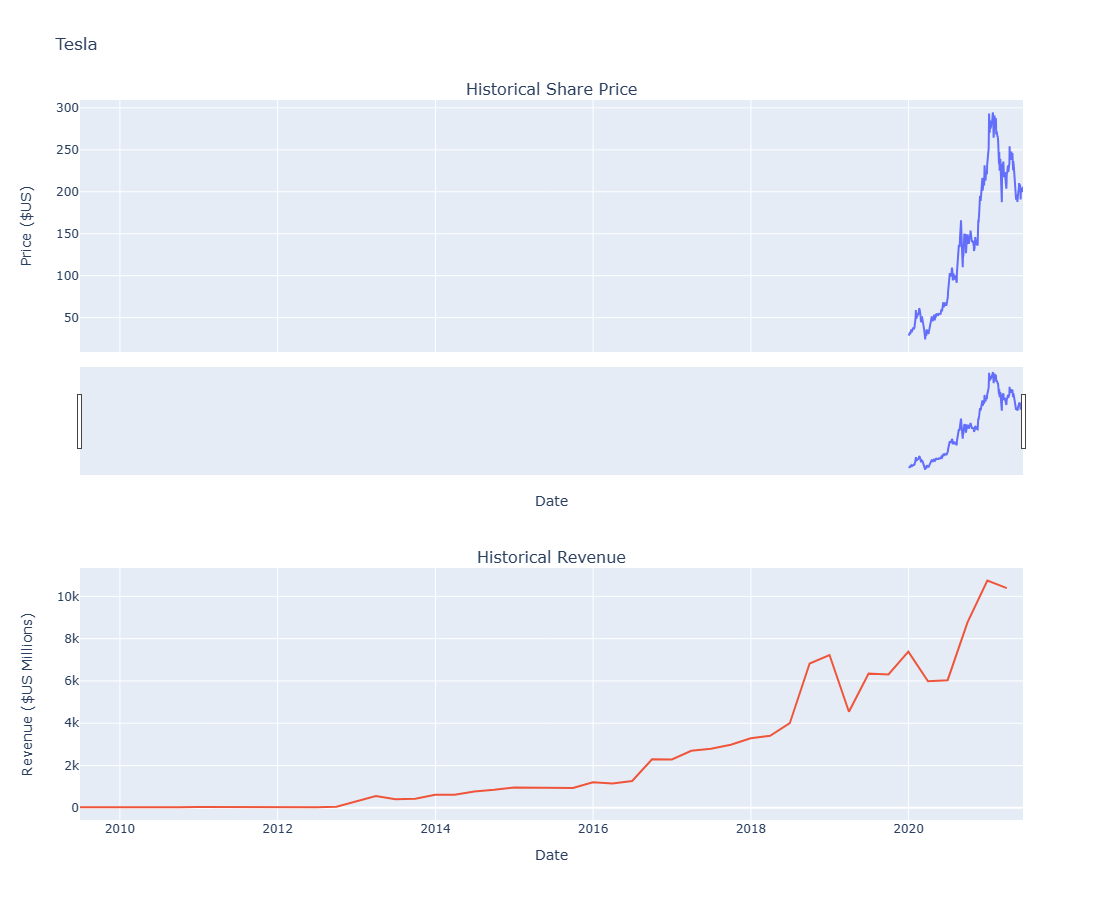

In [29]:
#Question 5  Tesla stock and revenue Dashboard#
warnings.filterwarnings("ignore")

# Fetch Tesla stock data using yfinance
tesla_stock_data = yf.download('TSLA', start='2020-01-01', end='2021-06-30', progress=False)

# Use the make_graph function
make_graph(tesla_stock_data.reset_index(), tesla_revenue, 'Tesla')



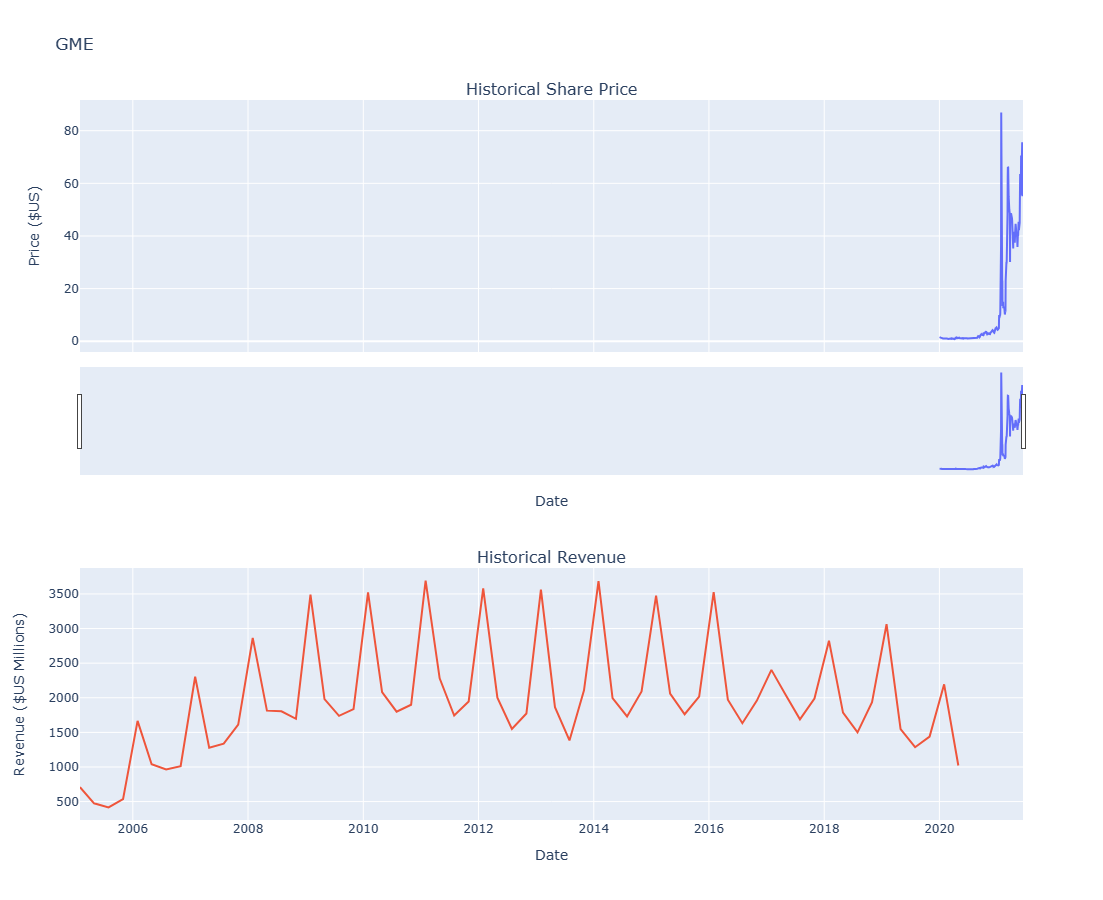

In [30]:
#Gme Stock and revenue dashboard question 6#
warnings.filterwarnings("ignore")



# Fetch GME stock data using yfinance
gme_stock_data = yf.download('GME', start='2020-01-01', end='2021-06-30', progress=False)

# Use the make_graph function
make_graph(gme_stock_data.reset_index(), gme_revenue, 'GME')
